In [138]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [139]:
# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
import japanize_matplotlib

# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)

# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format

# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14

# 乱数の種
random_seed = 123

オリジナルURL   
https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

#### データ項目メモ

instant インデックス  
dteday 日付(yy-mm-dd)  
season 季節 (1: 冬 2: 春 3: 夏 4:秋)  
yr 年 (0: 2011, 1:2012)  
mnth 月  (1 - 12)  
hr 時間  (0 - 23)  
holiday 祝日  
weekday 曜日 (0 - 6)  
workingday  勤務日 (1: 勤務日 0: 休日)  
weathersit 天気 (1: 晴れから曇り 2: 霧 3: 小雨 4: 大雨)  
temp 気温 (正規化済み)  
atemp 体感気温 (正規化済み)  
hum 湿度 (正規化済み)  
windspeed 風速 (正規化済み)  
casual 臨時ユーザー利用数  
registered 登録ユーザー利用数  
cnt 全体ユーザー利用数  

In [140]:
# ダウンロード元URL
url = 'https://archive.ics.uci.edu/ml/\
machine-learning-databases/00275/\
Bike-Sharing-Dataset.zip'

# 公開データのダウンロードと解凍
!wget $url -O Bike-Sharing-Dataset.zip | tail -n 1
!unzip -o Bike-Sharing-Dataset.zip | tail -n 1

--2021-06-24 13:37:45--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase 100%[===================>] 273.43K   422KB/s    in 0.6s    

2021-06-24 13:37:47 (422 KB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992/279992]

  inflating: hour.csv                


In [141]:
# day.csvをデータフレームに取り込み
# 日付を表す列はparse_datesで指定する
df = pd.read_csv('day.csv', parse_dates=[1])

In [142]:
# instant は連番で予測で不要なので削除
df = df.drop('instant', axis=1)

# 項目名の日本語化

columns = [
    '日付',  '季節',  '年', '月', '祝日', '曜日', '勤務日', '天気', 
    '気温', '体感温度',  '湿度', '風速',
    '臨時ユーザー利用数', '登録ユーザー利用数', '全体ユーザー利用数'
]

# 項目名を日本語に置き換え
df.columns = columns

#### データ確認

In [143]:
# 先頭5行の確認
display(df.head())

# 最終5行の確認
# display(df.tail())

,日付,季節,年,月,祝日,曜日,勤務日,天気,気温,体感温度,湿度,風速,臨時ユーザー利用数,登録ユーザー利用数,全体ユーザー利用数
0,2011-01-01,1,0,1,0,6,0,2,0.3442,0.3636,0.8058,0.1604,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.3635,0.3537,0.6961,0.2485,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.1964,0.1894,0.4373,0.2483,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.2000,0.2121,0.5904,0.1603,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.2270,0.2293,0.4370,0.1869,82,1518,1600


### データ前処理とデータ分割

#### データ前処理

目的変数と、日付だけのデータフレームを作成する
※アルゴリズムの制限で列名を変更する

In [144]:
# 「日付」と「登録ユーザー利用数」のみ抽出し、
# 列名を日付:ds 、登録ユーザー利用数:y に置き換えたデータフレームdf2を作る

# データフレーム全体のコピー
df2 = df.copy()

# 「日付」「登録ユーザー利用数」列の抽出
df2 = df2[['日付', '登録ユーザー利用数']]

# 列名の置き換え
df2.columns = ['ds', 'y']

# 結果確認
display(df2.head())

,ds,y
0,2011-01-01,654
1,2011-01-02,670
2,2011-01-03,1229
3,2011-01-04,1454
4,2011-01-05,1518


### Darts インストール

Dartsは時系列予測モデルのライブラリ群で、
データ形式が同じで複数のモデルを検証できるように設定されてる


各モデルので、回帰の時のような交差検証とグリットサーチができる
バックテストやグリットサーチ


In [145]:
pip install darts

  Using cached https://files.pythonhosted.org/packages/ce/63/74c0b6184b6b169b121bb72458818ee60a7d7c436d7b1907bd5874188c55/matplotlib-3.4.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f3/d4/3fe3b5bf9886912b64ef040040aec356fa48825e5a829a84c2667afdf952/pandas-1.2.3-cp37-cp37m-manylinux1_x86_64.whl
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.22.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
  Found existing installation: pandas 1.0.1
    U

#### データ分割
2012年11月1日より前を訓練データ(x_train)に、後ろを検証データ(x_test)にする

In [146]:
from darts import TimeSeries

series = TimeSeries.from_dataframe(df2, time_col='ds', value_cols='y')

In [147]:
x_train, x_test = series.split_after(pd.Timestamp('20121031'))

print(x_train)
print(x_test)

               y
ds              
2011-01-01   654
2011-01-02   670
2011-01-03  1229
2011-01-04  1454
2011-01-05  1518
...          ...
2012-10-27  5209
2012-10-28  3461
2012-10-29    20
2012-10-30  1009
2012-10-31  5147

[670 rows x 1 columns]
Freq: D
               y
ds              
2012-11-01  5520
2012-11-02  5229
2012-11-03  4109
2012-11-04  3906
2012-11-05  4881
...          ...
2012-12-27  1867
2012-12-28  2451
2012-12-29  1182
2012-12-30  1432
2012-12-31  2290

[61 rows x 1 columns]
Freq: D


### Matplotlibの指定バージョンをインストール

In [148]:
pip install matplotlib==3.1.3

  Using cached https://files.pythonhosted.org/packages/4c/9b/35ab3469fd1509f7636a344940569ebfd33239673fd2318e80b4700a257c/matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl
ERROR: darts 0.8.1 has requirement matplotlib==3.4.1, but you'll have matplotlib 3.1.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.4.1
    Uninstalling matplotlib-3.4.1:
      Successfully uninstalled matplotlib-3.4.1


### 時系列予測モデルを呼び出す

ExponentialSmoothing

Prophet

ARIMAARIMA

In [149]:
# ExponentialSmoothing
from darts.models import ExponentialSmoothing
algorithm1 = ExponentialSmoothing()

# Prophet
from fbprophet import Prophet
from darts.models.prophet import Prophet
algorithm2 = Prophet()

# ARIMA
from darts.models import ARIMA
algorithm3 = ARIMA()

algorithms = [algorithm1, algorithm2, algorithm3]

In [150]:
def eval_model(model, train, n, series, cnt):
    pred_series = model.predict(len(n))
    plt.figure(figsize=(12,10))
    series.plot(label='actual', lw=1)
    pred_series.plot(label='forecast', lw=1) 
    plt.legend()
    plt.xlabel(cnt);

In [151]:
def backtest_algorithm(algorithm, series, timestamp, cnt ):

  backtest_series = algorithm.historical_forecasts(series = series,
                                                start = pd.Timestamp(timestamp),
                                                forecast_horizon = 6,
                                                retrain = False,
                                                verbose = True)

  plt.figure(figsize=(20,12))
  series.plot(label='actual', lw=1)
  backtest_series.plot(label='backtest', lw=1)
  plt.legend()
  plt.xlabel(cnt)
  plt.title('Backtest, Transformer Bike Sharing 2 Month Predict');
  print('MAPE: {:.2f}%'.format(mape(scaler.inverse_transform(series),
                                  scaler.inverse_transform(backtest_series))))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


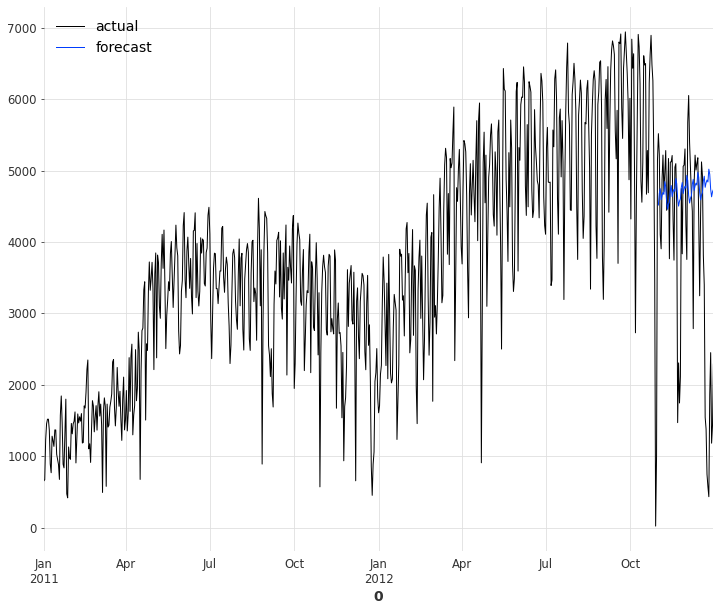

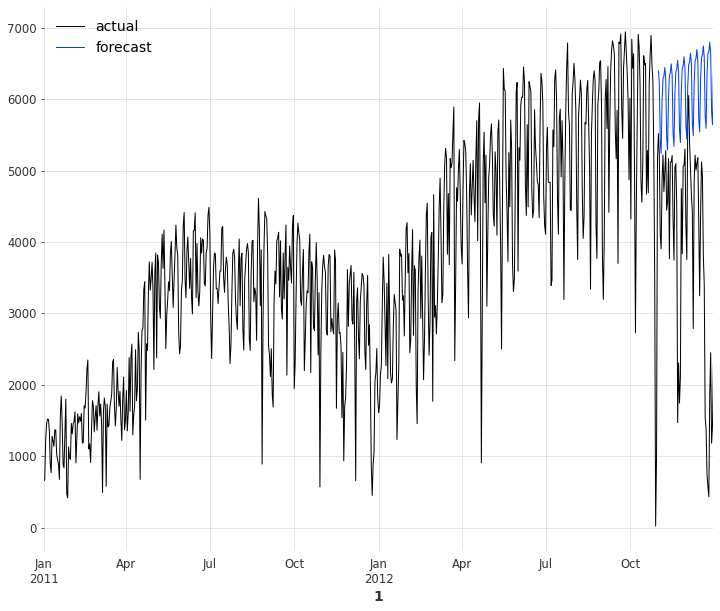

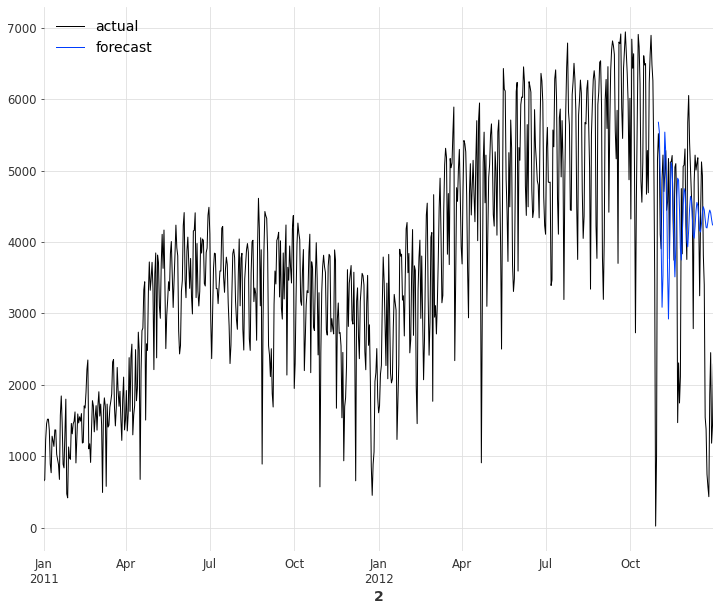

In [153]:
cnt = 0

for algorithm in algorithms:  
  algorithm.fit(x_train)
  eval_model(algorithm, x_train, x_test, series, cnt)
  #backtest_algorithm(algorithm, series, '20121031', cnt)     
  cnt = cnt + 1

In [154]:
from tqdm import tqdm_notebook as tqdm

from torch.utils.tensorboard import SummaryWriter
from darts.models import RNNModel, TransformerModel

from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.dataprocessing.transformers import Scaler

# Read data:
# series = AirPassengersDataset().load()
series = TimeSeries.from_dataframe(df2, time_col='ds', value_cols='y')

# Create training and validation sets:
train, val = series.split_after(pd.Timestamp('20121031'))

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
# Change name
scaler = Scaler()
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)
series_scaled = scaler.transform(series)

In [155]:
def eval_model_RNN(model, n, series, val_series, cnt):
    pred_series = model.predict(len(n))
    plt.figure(figsize=(12,10))
    series.plot(label='actual')
    pred_series.plot(label='forecast')
    plt.title('MAPE: {:.2f}%'.format(mape(pred_series, val_series)))
    plt.legend()
    plt.xlabel(cnt);

In [156]:
def backtest_algorithm_RNN(algorithm, series_scaled, timestamp, cnt ):

  backtest_series = algorithm.historical_forecasts(series = series_scaled,
                                                start = pd.Timestamp(timestamp),
                                                forecast_horizon = 3,
                                                retrain = False,
                                                verbose = True)

  plt.figure(figsize=(20,12))
  series_scaled.plot(label='actual', lw=2)
  backtest_series.plot(label='backtest', lw=2)
  plt.legend()
  plt.xlabel(cnt)
  plt.title('Backtest, Transformer Bike Sharing 2 Month Predict');
  print('MAPE: {:.2f}%'.format(mape(scaler.inverse_transform(series_scaled),
                                  scaler.inverse_transform(backtest_series))))

### RNNモデル

LSTM

Transfomer

GRU


In [157]:
INPUT_LEN = 12
OUTPUT_LEN = 1
BATCH_SIZE = 16
EPOCH_SIZE = 50
DROPOUT_SIZE = 0.4
RANDAM_STATE_VAL = 42

algorithm4 = RNNModel(
    model='LSTM',
    input_chunk_length = INPUT_LEN,
    output_chunk_length = OUTPUT_LEN,
    batch_size = BATCH_SIZE,
    n_epochs = EPOCH_SIZE,
    hidden_size = 25,
    n_rnn_layers = 1,
    dropout = DROPOUT_SIZE,
    optimizer_kwargs = {'lr': 1e-3},
    model_name = 'Air_RNN',
    log_tensorboard = True,
    random_state = RANDAM_STATE_VAL
)

algorithm5 = RNNModel(
    model='GRU',
    input_chunk_length = INPUT_LEN,
    output_chunk_length = OUTPUT_LEN,
    batch_size = BATCH_SIZE,
    n_epochs=EPOCH_SIZE,
    hidden_size = 25,
    n_rnn_layers = 1,
    dropout = DROPOUT_SIZE,
    nr_epochs_val_period = 1,
    optimizer_kwargs = {'lr': 1e-3},
    model_name = 'sun_GRU',
    log_tensorboard = True,
    random_state = RANDAM_STATE_VAL
)

algorithm6 = TransformerModel(
    input_chunk_length = INPUT_LEN,
    output_chunk_length = OUTPUT_LEN,
    batch_size = BATCH_SIZE,
    n_epochs = EPOCH_SIZE,
    model_name = 'air_transformer',
    log_tensorboard = True,
    nr_epochs_val_period = 10,
    d_model = 32,
    nhead = 16,
    num_encoder_layers = 3,
    num_decoder_layers = 3,
    dim_feedforward = 512,
    dropout = 0.4,
    activation = "relu",
    random_state = RANDAM_STATE_VAL,
)

algorithms = [algorithm4, algorithm5, algorithm6,]

In [ ]:
cnt = 0

for algorithm in algorithms:
  algorithm.fit(series=train_scaled, val_series=val_scaled, verbose=True)
  eval_model_RNN(algorithm, val, series_scaled, val_scaled ,cnt)  
  backtest_algorithm_RNN(algorithm, series_scaled, '20121031', cnt)  
  cnt = cnt + 1

[2021-06-24 13:39:25,666] INFO | darts.models.torch_forecasting_model | Train dataset contains 658 samples.
[2021-06-24 13:39:25,666] INFO | darts.models.torch_forecasting_model | Train dataset contains 658 samples.
INFO:darts.models.torch_forecasting_model:Train dataset contains 658 samples.
  2%|▏         | 1/50 [00:00<00:09,  4.90it/s]

 22%|██▏       | 11/50 [00:02<00:07,  4.97it/s]

 42%|████▏     | 21/50 [00:04<00:05,  5.04it/s]

 64%|██████▍   | 32/50 [00:06<00:03,  5.19it/s]

 84%|████████▍ | 42/50 [00:08<00:01,  5.19it/s]

100%|██████████| 60/60 [00:00<00:00, 88.65it/s]
[2021-06-24 13:39:36,608] INFO | darts.models.torch_forecasting_model | Train dataset contains 658 samples.
[2021-06-24 13:39:36,608] INFO | darts.models.torch_forecasting_model | Train dataset contains 658 samples.
INFO:darts.models.torch_forecasting_model:Train dataset contains 658 samples.
  0%|          | 0/50 [00:00<?, ?it/s]

MAPE: 66.69%


  2%|▏         | 1/50 [00:00<00:10,  4.70it/s]

  4%|▍         | 2/50 [00:00<00:10,  4.72it/s]

  8%|▊         | 4/50 [00:00<00:09,  4.78it/s]

 10%|█         | 5/50 [00:01<00:09,  4.63it/s]

 12%|█▏        | 6/50 [00:01<00:09,  4.55it/s]

 14%|█▍        | 7/50 [00:01<00:09,  4.57it/s]

 16%|█▌        | 8/50 [00:01<00:09,  4.56it/s]

 18%|█▊        | 9/50 [00:01<00:08,  4.63it/s]

 20%|██        | 10/50 [00:02<00:08,  4.65it/s]

 22%|██▏       | 11/50 [00:02<00:08,  4.67it/s]

 24%|██▍       | 12/50 [00:02<00:08,  4.69it/s]

 26%|██▌       | 13/50 [00:02<00:07,  4.68it/s]

 30%|███       | 15/50 [00:03<00:07,  4.74it/s]

 32%|███▏      | 16/50 [00:03<00:07,  4.74it/s]

 34%|███▍      | 17/50 [00:03<00:07,  4.70it/s]

 36%|███▌      | 18/50 [00:03<00:06,  4.70it/s]

 38%|███▊      | 19/50 [00:04<00:06,  4.71it/s]

 40%|████      | 20/50 [00:04<00:06,  4.68it/s]

 42%|████▏     | 21/50 [00:04<00:06,  4.72it/s]

 44%|████▍     | 22/50 [00:04<00:05,  4.72it/s]

Training loss: 0.0137, validation loss: 0.0262, best val loss: 0.0257

 46%|████▌     | 23/50 [00:04<00:05,  4.79it/s]

 48%|████▊     | 24/50 [00:05<00:05,  4.68it/s]

 50%|█████     | 25/50 [00:05<00:05,  4.63it/s]

 52%|█████▏    | 26/50 [00:05<00:05,  4.62it/s]

 56%|█████▌    | 28/50 [00:05<00:04,  4.71it/s]

 58%|█████▊    | 29/50 [00:06<00:04,  4.67it/s]

 60%|██████    | 30/50 [00:06<00:04,  4.72it/s]

 62%|██████▏   | 31/50 [00:06<00:04,  4.73it/s]

 64%|██████▍   | 32/50 [00:06<00:03,  4.71it/s]

 66%|██████▌   | 33/50 [00:07<00:03,  4.70it/s]

 68%|██████▊   | 34/50 [00:07<00:03,  4.71it/s]

 70%|███████   | 35/50 [00:07<00:03,  4.72it/s]

 74%|███████▍  | 37/50 [00:07<00:02,  4.74it/s]

 76%|███████▌  | 38/50 [00:08<00:02,  4.73it/s]

 78%|███████▊  | 39/50 [00:08<00:02,  4.76it/s]

 80%|████████  | 40/50 [00:08<00:02,  4.68it/s]

 82%|████████▏ | 41/50 [00:08<00:01,  4.69it/s]

 84%|████████▍ | 42/50 [00:08<00:01,  4.69it/s]

 86%|████████▌ | 43/50 [00:09<00:01,  4.75it/s]

 88%|████████▊ | 44/50 [00:09<00:01,  4.73it/s]

 90%|█████████ | 45/50 [00:09<00:01,  4.73it/s]

 94%|█████████▍| 47/50 [00:10<00:00,  4.75it/s]

 98%|█████████▊| 49/50 [00:10<00:00,  4.83it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

100%|██████████| 60/60 [00:00<00:00, 98.44it/s] 
[2021-06-24 13:39:48,206] INFO | darts.models.torch_forecasting_model | Train dataset contains 658 samples.
[2021-06-24 13:39:48,206] INFO | darts.models.torch_forecasting_model | Train dataset contains 658 samples.
INFO:darts.models.torch_forecasting_model:Train dataset contains 658 samples.


MAPE: 69.05%


  2%|▏         | 1/50 [00:02<01:39,  2.03s/it]

 22%|██▏       | 11/50 [00:21<01:16,  1.96s/it]

 30%|███       | 15/50 [00:29<01:07,  1.93s/it]